In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
import api_keys
print(api_keys.api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"
output_data_file = "cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

&APPID=13c9a8c0ee97c3553610d9ca1d8a10de


## Generate Cities List

In [61]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities[0:5])
print(len(cities))

['hobart', 'bengkulu', 'isangel', 'ponta do sol', 'arraial do cabo']
603


## Perform API Calls

In [62]:
raw_data = {
    'City Name': [],
    'Latitude': [],
    'Temperature': [], 
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': []}


# # # OpenWeatherMap API Key
api_key = api_keys.api_key
print(f'api key is {api_key}')

# # # Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

i = 0

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        raw_data["City Name"].append(city)
        raw_data["Latitude"].append(weather_json["coord"]["lat"])
        raw_data["Temperature"].append(weather_json["main"]["temp"])
        raw_data["Humidity"].append(weather_json["main"]["humidity"])
        raw_data["Cloudiness"].append(weather_json["clouds"]["all"])
        raw_data["Wind Speed"].append(weather_json["wind"]["speed"])

        print(str(i) + ". " + city)
        i += 1
#     time.sleep(1)

df = pd.DataFrame(raw_data)
df

api key is &APPID=13c9a8c0ee97c3553610d9ca1d8a10de
0. hobart
1. isangel
2. ponta do sol
3. arraial do cabo
4. puerto carreno
5. tasiilaq
6. rolla
7. alofi
8. punta arenas
9. havelock
10. dunedin
11. sawtell
12. vaini
13. kavaratti
14. provideniya
15. aklavik
16. pisco
17. busselton
18. puerto ayora
19. moindou
20. new norfolk
21. albany
22. hilo
23. bredasdorp
24. saint george
25. bluff
26. faanui
27. lawrence
28. cape town
29. salalah
30. gat
31. east london
32. ushuaia
33. cherskiy
34. dalby
35. mataura
36. innisfail
37. poltavka
38. tuktoyaktuk
39. miles city
40. airai
41. qaanaaq
42. raudeberg
43. ribeira grande
44. panukulan
45. baykit
46. mar del plata
47. san patricio
48. port keats
49. grande riviere du nord
50. owo
51. misratah
52. erdaojiang
53. port elizabeth
54. bassila
55. zambezi
56. moa
57. el alto
58. praia
59. ca mau
60. liverpool
61. yulara
62. kiama
63. changying
64. nanortalik
65. rikitea
66. kampot
67. nikolskoye
68. santa maria
69. silleda
70. ilo
71. port alfred


,City Name,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,hobart,-42.88,57.20,58,75,21.92
1,isangel,-19.55,71.78,100,12,12.55
2,ponta do sol,-20.63,80.51,31,0,4.94
3,arraial do cabo,-22.97,71.60,73,40,23.04
4,puerto carreno,6.19,77.00,94,75,3.15
5,tasiilaq,65.61,51.80,76,90,20.80
6,rolla,37.95,84.20,48,1,5.82
7,alofi,-19.06,73.40,73,44,11.41
8,punta arenas,-53.16,40.05,80,75,12.75
9,havelock,34.88,79.38,94,90,19.46


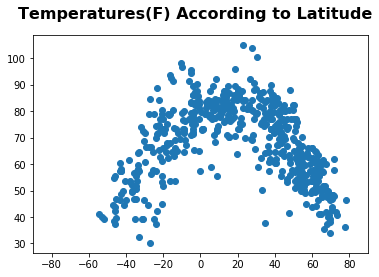

In [63]:
temp_plot = plt.scatter(raw_data["Latitude"], raw_data["Temperature"])
plt.xlim(-90, 90)
plt.suptitle("Temperatures(F) According to Latitude", fontsize=16, fontweight="bold")
plt.savefig("temperature.png")
plt.show()

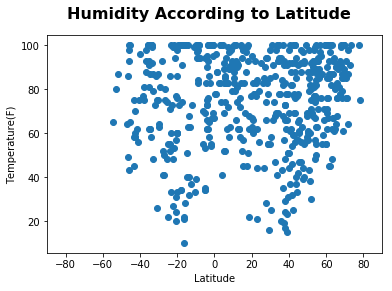

In [64]:
humidity_plot = plt.scatter(raw_data["Latitude"], raw_data["Humidity"])
plt.xlim(-90, 90)
plt.suptitle("Humidity According to Latitude", fontsize=16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig("humidity.png")
plt.show()

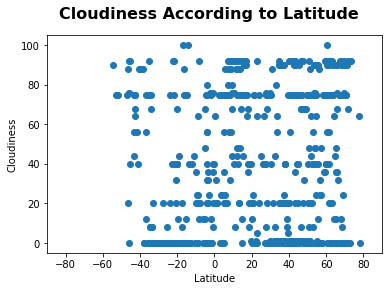

In [65]:
cloud_plot = plt.scatter(raw_data["Latitude"], raw_data["Cloudiness"])
plt.xlim(-90, 90)
plt.suptitle("Cloudiness According to Latitude", fontsize=16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("cloudiness.png")
plt.show()

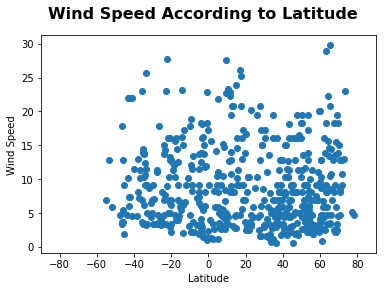

In [66]:
wind_plot = plt.scatter(raw_data["Latitude"], raw_data["Wind Speed"])
plt.xlim(-90, 90)
plt.suptitle("Wind Speed According to Latitude", fontsize=16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("wind_speed_plot.png")
plt.show()

In [67]:
print("1) The closer we get to the equator, the more the temperature increases." +
    "\n2) There are more places with higher humidity than low humidity." +
    "\n3) Cloudiness is pretty evenly scattered." +
    "\n4) There are more areas with lower wind speed than high wind speeds.")


1) The closer we get to the equator, the more the temperature increases.
2) There are more places with higher humidity than low humidity.
3) Cloudiness is pretty evenly scattered.
4) There are more areas with lower wind speed than high wind speeds.


In [68]:

with open(output_data_file, "w") as csvfile:
    data_writer = csv.writer(csvfile)
    
    data_writer.writerow(["City Name", "Latitude", "Temperature", "Humidity", "Cloudiness", "Wind Speed"])

    i = 0
    for row in raw_data["City Name"]:
        city_name = raw_data["City Name"][i]
        latitude = raw_data["Latitude"][i]
        temperature = raw_data["Temperature"][i]
        humidity = raw_data["Humidity"][i]
        cloudiness = raw_data["Cloudiness"][i]
        wind_speed = raw_data["Wind Speed"][i]
        final_string = city_name + "," + str(latitude)
        data_writer.writerow([city_name, latitude, temperature, humidity, cloudiness, wind_speed]) 
        i += 1